# Apparel Recommendations using Convolutional Neural Network

## Get the feature vectors of all apparel images

In [1]:
import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-09-21 23:22:16.099849: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-21 23:22:16.958345: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
import numpy as np

# dimensions of our images.
img_width, img_height = 224, 224
train_data_dir = 'images/'  # Make sure this path is correct
nb_train_samples = 16042
batch_size = 1

def save_bottlebeck_features():
    asins = []
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    print(f"Found {generator.samples} images.")  # Debugging generator

    for i in generator.filenames:
        asins.append(i[2:-5])

    # Ensure the generator is yielding samples
    if generator.samples > 0:
        bottleneck_features_train = model.predict(generator, steps=nb_train_samples // batch_size)
        
        print(f"Bottleneck features shape: {bottleneck_features_train.shape}")  # Debugging output shape
        
        # Reshape based on actual output size
        bottleneck_features_train = bottleneck_features_train.reshape(bottleneck_features_train.shape[0], -1)

        np.save(open('models/16k_data_cnn_features.npy', 'wb'), bottleneck_features_train)
        np.save(open('models/16k_data_cnn_feature_asins.npy', 'wb'), np.array(asins))
    else:
        print("No images found. Please check the data directory.")

save_bottlebeck_features()


Found 179 images belonging to 1 classes.
Found 179 images.


/home/sudhanshu/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16042/16042 ━━━━━━━━━━━━━━━━━━━━ 6s 358us/step 
Bottleneck features shape: (179, 7, 7, 512)


2024-09-21 23:22:34.792242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/sudhanshu/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


# load the extracted features

In [5]:
# bottleneck_features_train = np.load('workshop/models/16k_data_cnn_features.npy')
asins = np.load('models/16k_data_cnn_feature_asins.npy')

## get the most similar apparels using euclidean distance measure

In [6]:
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])
asins = list(asins)

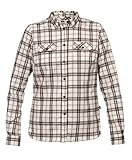

Product Title:  fjallraven  womens fjallglim stretch shirt longsleeve chalk white xs 
Euclidean Distance from input image: 5.3947965e-06
Amazon Url: www.amazon.com/dp/B073RTHZRC


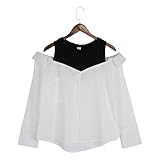

Product Title:  focal20 white black patchwork blouse fake 2 pieces long sleeve shirt vest shoulder 
Euclidean Distance from input image: 49.422832
Amazon Url: www.amazon.com/dp/B071HLXV6M


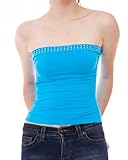

Product Title:  ladies blue seamless stone set tube top 
Euclidean Distance from input image: 49.6932
Amazon Url: www.amazon.com/dp/B0060Q7E0W


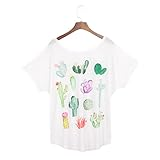

Product Title:  focal20 women cute cactus print tshirt short sleeve white tee colorful graphic round neck tops shirt 
Euclidean Distance from input image: 50.02623
Amazon Url: www.amazon.com/dp/B074JXX1X3


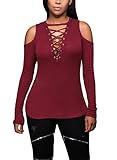

Product Title:  farysays womens casual cutout shoulder blouse laceup ribbed tops tshirt burgundy l 
Euclidean Distance from input image: 50.239338
Amazon Url: www.amazon.com/dp/B01MF6DSHE


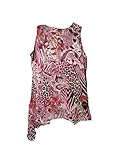

Product Title:  fever womens sleeveless blouse red coral large 
Euclidean Distance from input image: 50.239338
Amazon Url: www.amazon.com/dp/B06XQ4ZCJK


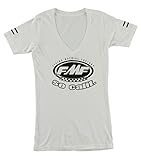

Product Title:  fmf womens retro vneck graphic tshirtxl white 
Euclidean Distance from input image: 50.937466
Amazon Url: www.amazon.com/dp/B01N9TP2LB


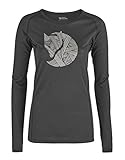

Product Title:  fjallraven  womens abisko trail tshirt printed longsleeve dark grey xxs 
Euclidean Distance from input image: 51.055817
Amazon Url: www.amazon.com/dp/B073WL6NH1


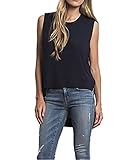

Product Title:  feel piece terre jacobs hermosa top mediumlarge navy 
Euclidean Distance from input image: 51.272923
Amazon Url: www.amazon.com/dp/B074VXYKZK


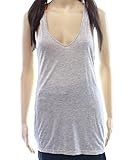

Product Title:  feel piece womens large ml uneck tank cami top gray l 
Euclidean Distance from input image: 51.317886
Amazon Url: www.amazon.com/dp/B071G16FZL


In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from IPython.display import display, Image

# Load your preprocessed data
data = pd.read_pickle('pickels/16k_apparel_data_preprocessed')
asins = data['asin'].tolist()  # Assuming 'asin' is the column with ASINs

# Load the bottleneck features
bottleneck_features_train = np.load('models/16k_data_cnn_features.npy')

def get_similar_products_cnn(doc_id, num_results, bottleneck_features_train):
    # Get the index of the document ID in the asins list
    doc_id = asins.index(data['asin'].iloc[doc_id])
    
    # Calculate pairwise distances
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1, -1))

    # Get the indices of the closest products
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]

    # Display results
    for i in range(len(indices)):
        rows = data[['medium_image_url', 'title']].loc[data['asin'] == asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amazon.com/dp/' + asins[indices[i]])

# Call the function with the desired document ID and number of results
get_similar_products_cnn(120, 10, bottleneck_features_train)

